In [11]:
from idf_analysis.idf_class import IntensityDurationFrequencyAnalyse
from idf_analysis.definitions import *
import pandas as pd
from os import path
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('bmh')

import matplotlib
matplotlib.rcParams.update({
    'figure.figsize': (10, 8),
    'figure.dpi': 100,
    'figure.constrained_layout.use': True,
})

# Intensity Duration Frequency Analyse - EXTENDED

In [12]:
# sub-folder for the results
output_directory = path.join('ehyd_112086_idf_data')

# initialize of the analysis class
idf = IntensityDurationFrequencyAnalyse(series_kind=SERIES.PARTIAL, worksheet=METHOD.KOSTRA, extended_durations=True)

# reading the pandas series of the precipitation (data from ehyd.gv.at - ID=112086)
# You need to install `pyarrow` or `fastparquet` to read and write parquet files.
series = pd.read_parquet('ehyd_112086.parquet').squeeze('columns') # ['precipitation']

# setting the series for the analysis
idf.set_series(series)

# auto-save the calculated parameter so save time for a later use
idf.auto_save_parameters(path.join(output_directory, 'idf_parameters.yaml'))

_balance_parameter_change


In [13]:
events = idf.rain_events
"Columns: ", events.columns,  "| Number of events: ", events.index.size

('Columns: ',
 Index(['start', 'end', 'duration', 'rain_sum', 'last_event'], dtype='object'),
 '| Number of events: ',
 1776)

In [14]:
# reduce number of event by limiting the minimum sum of rainfall
events = events[events[COL.LP] > 10].copy()
"Columns: ", events.columns,  "| Number of events: ", events.index.size

('Columns: ',
 Index(['start', 'end', 'duration', 'rain_sum', 'last_event'], dtype='object'),
 '| Number of events: ',
 311)

In [15]:
# add the maximum return period to the events and at which duration this period occurs
idf.add_max_return_periods_to_events(events)
"Columns: ", events.columns,  "| Number of events: ", events.index.size

calculating rainfall_sum data-frame:   0%|          | 0/21 [00:00<?, ?it/s]

calculating return_periods data-frame:   0%|          | 0/21 [00:00<?, ?it/s]

('Columns: ',
 Index(['start', 'end', 'duration', 'rain_sum', 'last_event',
        'max_return_period', 'max_return_period_duration'],
       dtype='object'),
 '| Number of events: ',
 311)

In [16]:
# reduce number of event by limiting the minimum return period of an event
events = events[events[COL.MAX_PERIOD] > 2].copy()
"Columns: ", events.columns,  "| Number of events: ", events.index.size

('Columns: ',
 Index(['start', 'end', 'duration', 'rain_sum', 'last_event',
        'max_return_period', 'max_return_period_duration'],
       dtype='object'),
 '| Number of events: ',
 21)

In [17]:
events

,start,end,duration,rain_sum,last_event,max_return_period,max_return_period_duration
104,2008-06-23 19:50:00,2008-06-23 23:16:00,0 days 03:26:00,34.8,2 days 21:52:00,5.443256,15
124,2008-07-17 14:14:00,2008-07-18 06:27:00,0 days 16:13:00,74.6,0 days 04:09:00,6.296477,120
126,2008-07-20 17:43:00,2008-07-21 03:55:00,0 days 10:12:00,27.7,2 days 02:48:00,2.831020,5760
271,2009-07-18 08:55:00,2009-07-18 13:19:00,0 days 04:24:00,58.0,2 days 01:56:00,3.379566,240
279,2009-08-21 19:49:00,2009-08-21 20:29:00,0 days 00:40:00,34.2,4 days 03:04:00,3.975974,20
282,2009-08-28 23:41:00,2009-08-29 00:42:00,0 days 01:01:00,49.3,1 days 03:44:00,19.719853,20
284,2009-09-04 00:31:00,2009-09-04 18:18:00,0 days 17:47:00,69.0,5 days 11:06:00,2.605674,1080
544,2011-08-03 19:53:00,2011-08-04 07:44:00,0 days 11:51:00,54.7,1 days 23:11:00,12.733190,20
662,2012-07-14 16:54:00,2012-07-15 13:06:00,0 days 20:12:00,59.8,1 days 01:15:00,3.719740,8640
772,2013-05-05 20:47:00,2013-05-07 12:40:00,1 days 15:53:00,119.5,0 days 17:31:00,30.573431,2880


In [18]:
# lets pick one event
event = events.loc[124]
event

start                         2008-07-17 14:14:00
end                           2008-07-18 06:27:00
duration                          0 days 16:13:00
rain_sum                                     74.6
last_event                        0 days 04:09:00
max_return_period                        6.296477
max_return_period_duration                    120
Name: 124, dtype: object

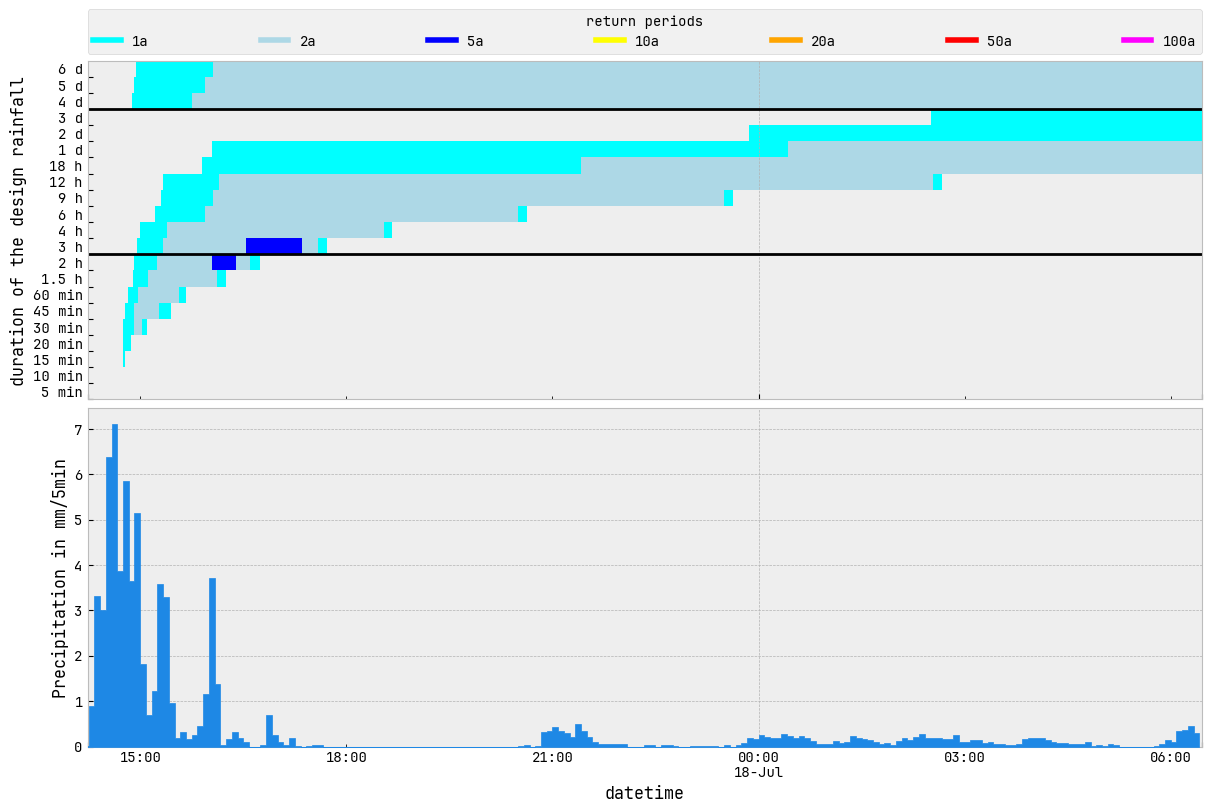

In [21]:
fig, caption = idf.event_plot(event)

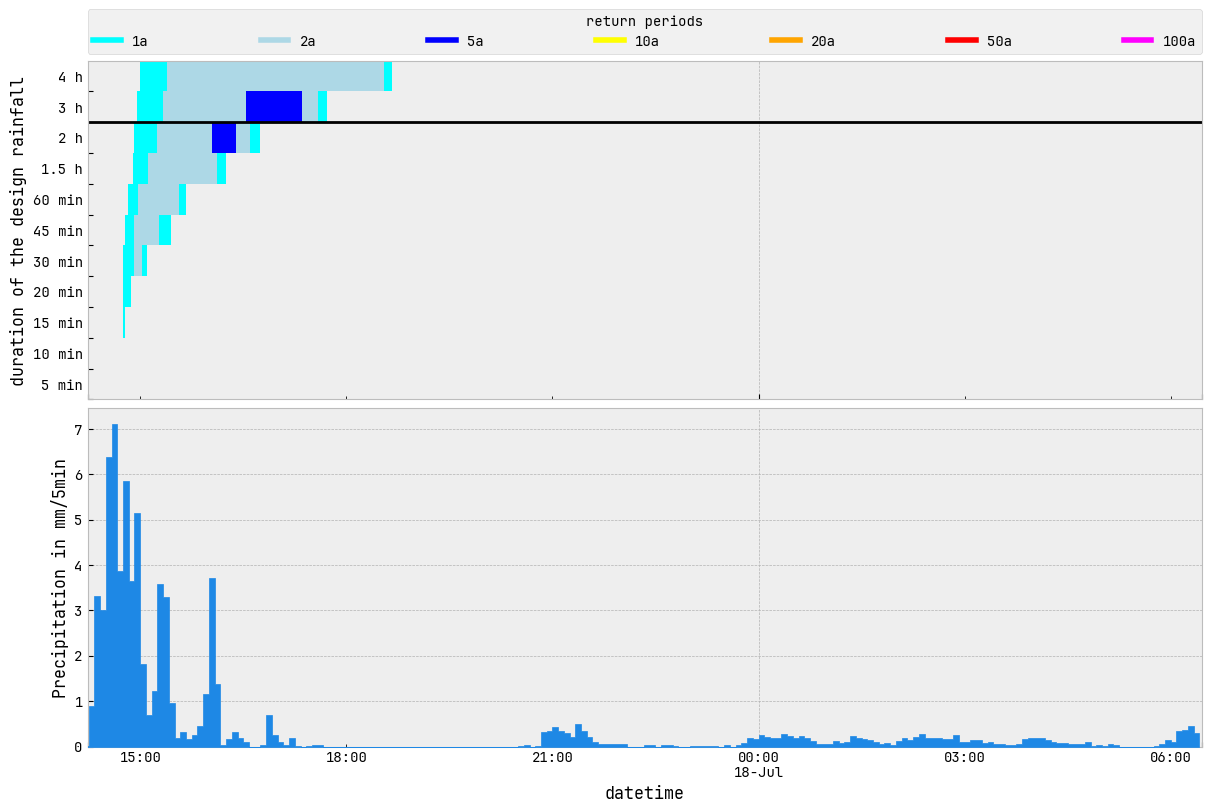

In [22]:
# you can also reduce the displayed duration steps
fig, caption = idf.event_plot(event, durations=idf.duration_steps[:11])